In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [10]:
# Generating synthetic dataset with five classes
np.random.seed(0)
X = np.random.randn(500, 10)  # 1000 samples, 10 features
Y = np.random.randint(0, 5, (500, 1))  # 5 classes

In [11]:
# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = X.shape[1]
        hiddenLayerNeurons1 = 20
        hiddenLayerNeurons2 = 15
        hiddenLayerNeurons3 = 10
        outLayerNeurons = 5  # Five output neurons for five classes

        self.learning_rate = 0.01
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_HI2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_HI3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_OH = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI1)
        hidden_output1 = np.tanh(hidden_input1)

        hidden_input2 = np.dot(hidden_output1, self.W_HI2)
        hidden_output2 = np.tanh(hidden_input2)

        hidden_input3 = np.dot(hidden_output2, self.W_HI3)
        hidden_output3 = np.tanh(hidden_input3)

        output_input = np.dot(hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = pred - Y
        hidden_error3 = output_error.dot(self.W_OH.T) * (1 - np.power(np.tanh(np.dot(X.dot(self.W_HI1), self.W_HI2).dot(self.W_HI3)), 2))
        hidden_error2 = hidden_error3.dot(self.W_HI3.T) * (1 - np.power(np.tanh(np.dot(X.dot(self.W_HI1), self.W_HI2)), 2))
        hidden_error1 = hidden_error2.dot(self.W_HI2.T) * (1 - np.power(np.tanh(np.dot(X, self.W_HI1)), 2))

        self.W_HI1 += X.T.dot(hidden_error1) * self.learning_rate
        self.W_HI2 += np.dot(np.tanh(np.dot(X, self.W_HI1)).T, hidden_error2) * self.learning_rate
        self.W_HI3 += np.dot(np.tanh(np.dot(np.tanh(np.dot(X, self.W_HI1)), self.W_HI2)).T, hidden_error3) * self.learning_rate
        self.W_OH += np.dot(np.tanh(np.dot(np.tanh(np.dot(np.tanh(np.dot(X, self.W_HI1)), self.W_HI2)), self.W_HI3)).T, output_error) * self.learning_rate

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

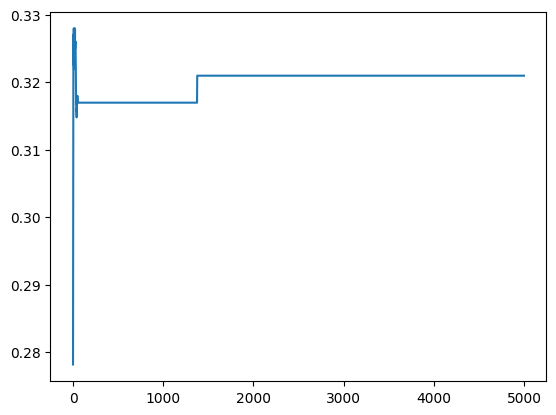

In [13]:
# Training the neural network
NN = NeuralNetwork()
err = []

for i in range(5000):
    NN.train(X_train, np.eye(5)[Y_train.reshape(-1)])
    err.append(np.mean(np.square(np.eye(5)[Y_train.reshape(-1)] - NN.feedForward(X_train))))

plt.plot(err)

In [14]:
# Testing the neural network
Y_pred = np.argmax(NN.feedForward(X_test), axis=1)

In [15]:
# Evaluating performance
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.24
Precision: 0.09790660225442835
Recall: 0.2148148148148148
F1 Score: 0.13226788432267886
Confusion Matrix:
[[ 0  0  9  0  4]
 [ 0  0 15  0  7]
 [ 0  0 10  0  8]
 [ 0  0  7  0 13]
 [ 0  0 13  0 14]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
